# OpenCV Filters HDMI

In this notebook, several filters will be applied to HDMI input images.

Those input sources and applied filters will then be displayed either directly in the notebook or on HDMI output.

To run all cells in this notebook a HDMI input source and HDMI output monitor are required.  

### Step 1: Load the overlay

In [1]:
from pynq.overlays.base import BaseOverlay
base = BaseOverlay("base.bit")

### Step 2: Initialize HDMI I/O

In [2]:
from pynq.lib.video import *

hdmi_in = base.video.hdmi_in
hdmi_out = base.video.hdmi_out
hdmi_in.configure(PIXEL_RGB)
hdmi_out.configure(hdmi_in.mode, PIXEL_RGB)
hdmi_in.start()
hdmi_out.start()

### Step 3: Show HDMI input frame within notebook using IPython Image

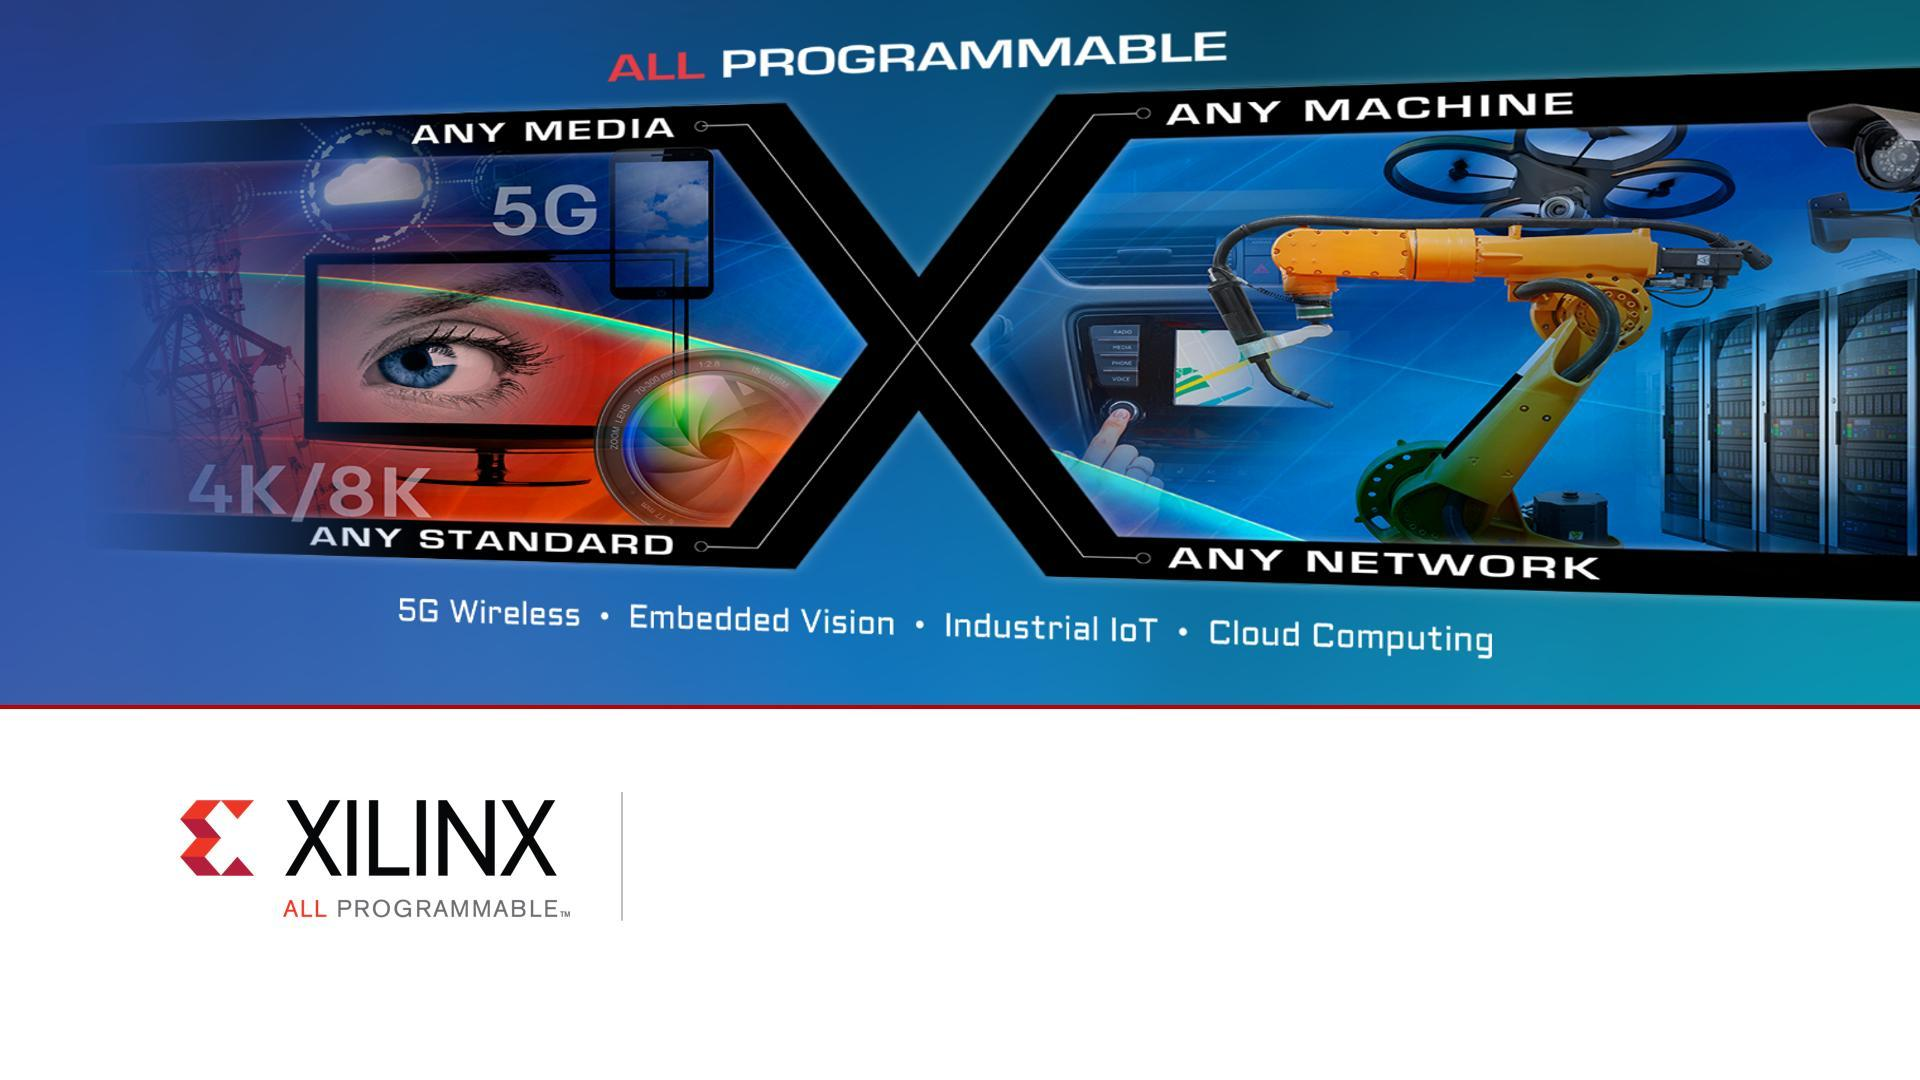

In [3]:
import PIL.Image
frame = hdmi_in.readframe()
img = PIL.Image.fromarray(frame)
img.save("/home/xilinx/jupyter_notebooks/base/video/data/opencv_filters.jpg")

img

### Step 4: Edge detection
Detecting edges on HDMI in and display on HDMI out with Laplacian filter.

In [4]:
import time
import cv2
import numpy as np
import time
numframes = 10
grayscale = np.ndarray(shape=(hdmi_in.mode.height, 
                              hdmi_in.mode.width), dtype=np.uint8)
result = np.ndarray(shape=(hdmi_in.mode.height, 
                           hdmi_in.mode.width), dtype=np.uint8)

start = time.time()

for _ in range(numframes):
    inframe = hdmi_in.readframe()
    cv2.cvtColor(inframe,cv2.COLOR_RGB2GRAY,dst=grayscale)
    inframe.freebuffer()
    cv2.Laplacian(grayscale, cv2.CV_8U, dst=result)

    outframe = hdmi_out.newframe()
    cv2.cvtColor(result, cv2.COLOR_GRAY2RGB,dst=outframe)
    hdmi_out.writeframe(outframe)
    
end = time.time()
print("Frames per second:  " + str(numframes / (end - start)))

Frames per second:  1.2999349273831002


### Step 5: Show same results within notebook
Output OpenCV results as JPEG.

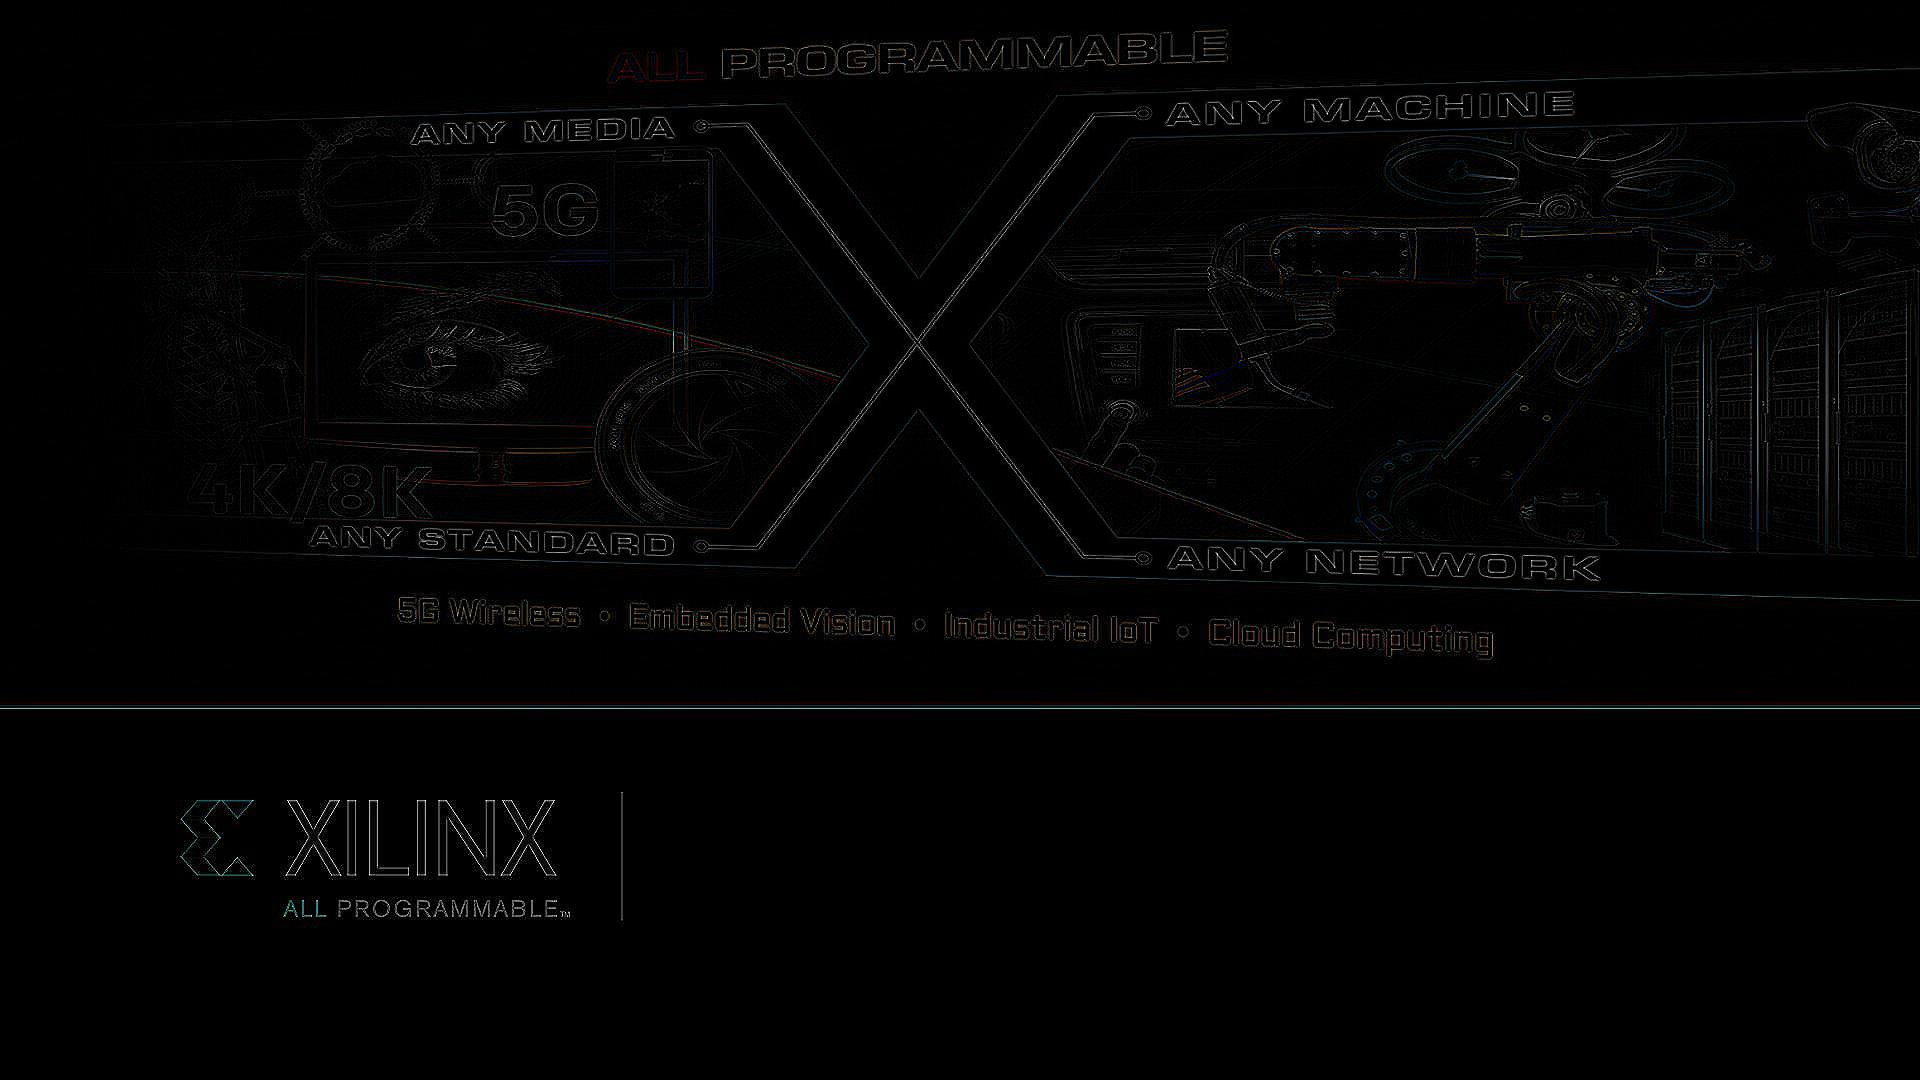

In [5]:
img = PIL.Image.fromarray(outframe)
img.save("/home/xilinx/jupyter_notebooks/base/video/data/opencv_filters.jpg")

img

### Step 6: Edge detection
Detecting edges on HDMI in and display on HDMI out with Canny Edge filter.

Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to “sure-edge” pixels, they are considered to be part of edges. Otherwise, they are also discarded. 

In [6]:
import cv2
import numpy as np
import time
numframes = 10
grayscale = np.ndarray(shape=(hdmi_in.mode.height, 
                              hdmi_in.mode.width), dtype=np.uint8)
result = np.ndarray(shape=(hdmi_in.mode.height, 
                           hdmi_in.mode.width), dtype=np.uint8)

start = time.time()

for _ in range(numframes):
    inframe = hdmi_in.readframe()
    cv2.cvtColor(inframe,cv2.COLOR_RGB2GRAY,dst=grayscale)
    inframe.freebuffer()
    cv2.Canny(grayscale, 100, 110, edges=result)
    
    outframe = hdmi_out.newframe()
    cv2.cvtColor(result, cv2.COLOR_GRAY2RGB,dst=outframe)
    hdmi_out.writeframe(outframe)
end = time.time()
print("Frames per second:  " + str(numframes / (end - start)))

Frames per second:  0.9861260081534766


## Step 7: Release HDMI

In [7]:
hdmi_out.stop()
hdmi_in.stop()
del hdmi_in, hdmi_out